<a href="https://colab.research.google.com/github/NathanUrinovsky/Image-Classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connecting Google Drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#importing modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pathlib

In [ ]:
#printing the location of the folder with all the sub-folders
data_root = pathlib.Path('/content/gdrive/My Drive/directory_of_the_images_in_your_drive')
print(data_root)

In [ ]:
#printing the locations of the sub-folders
for item in data_root.iterdir():
  print(item)

In [ ]:
#assigning the training_images variable to the 'training_data' folder, and the test_images variable to the 'test' folder
training_images = pathlib.Path('/content/gdrive/My Drive/directory_of_training_images')
test_images = pathlib.Path('/content/gdrive/My Drive/directory_of_testing_images')

In [ ]:
#printing all the training images' locations
for item in training_images.iterdir():
  print(item)

In [ ]:
#creating a function for plotting images
def plot_image(image):
  plt.imshow(image)
  plt.show()

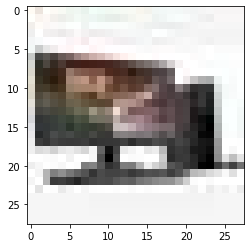

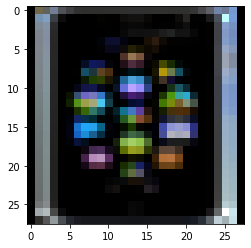

In [ ]:
#plotting two images from the training dataset. one computer image, and one phone image
computer_image = cv.imread("/content/gdrive/My Drive/directory_of_a_computer's_image")
phone_image = cv.imread("/content/gdrive/My Drive/directory_of_a_phone's_image")
plot_image(computer_image)
plot_image(phone_image)

In [ ]:
#assigning the classes' names that are going to be classified in a list called "class_names"
class_names = ["computer", "phone"]

In [ ]:
# assigning all the training labels in a numpy array. 0 = computer, 1 = phone
labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#assigning all the testing labels in a numpy array. 
test_labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
#creating a list with all the training images
X_train = []
for img_data in training_images.iterdir():
  new_img = cv.imread(str(img_data))
  X_train.append(new_img)

In [ ]:
#creating a list with all the testing images
X_test = []
for img_test in test_images.iterdir():
  new_img_test = cv.imread(str(img_test))
  X_test.append(new_img_test)

In [ ]:
#converting the X_train and X_test lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
#building the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
#compiling the model (initializing the loss function and optimizer)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the model
model.fit(X_train, labels, batch_size=5, epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 744.5344 - accuracy: 0.4750
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 218.4126 - accuracy: 0.6250
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 80.0707 - accuracy: 0.7750
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 45.0779 - accuracy: 0.7500
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 30.6507 - accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 9.3744 - accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 9.6456 - accuracy: 0.9000
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 2.5465 - accuracy: 0.9000
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 12.7433 - accuracy: 0.9250
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 2.6825 - accuracy: 0.9750


In [ ]:
#testing the model and saving the predictions into a list called "predictions"
predictions = model.predict(X_test)

In [ ]:
# the np.argmax(predictions[i]) returns 0 or 1 in this program (because there are currently 2 classes that are supposed to be classified).
# that's the reason we want to print class_names[(np.argmax(predictions[i])), it will return 'computer' or 'phone', instead of 0 or 1.
# as mentioned before, 0 = computer, 1 = phone.
for i in range(len(predictions)):
    print(class_names[np.argmax(predictions[i])])

computer
phone
computer
computer
computer
phone
phone
phone
phone
phone


In [ ]:
#evaluating the accuracy of the test
loss, acc = model.evaluate(X_test, test_labels)
print("Test accuracy: {:5.2f}%".format(100*acc))

1/1 [==============================] - 0s 1ms/step - loss: 17.8414 - accuracy: 0.9000
Test accuracy: 90.00%


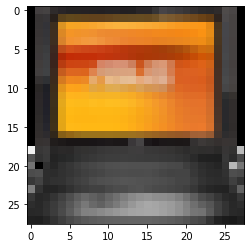

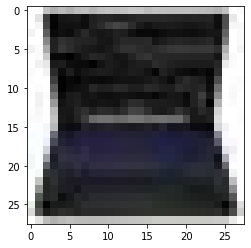

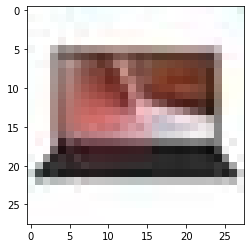

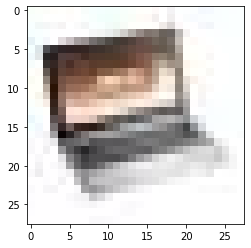

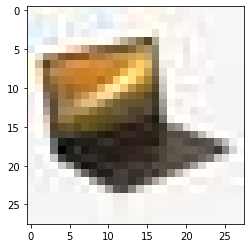

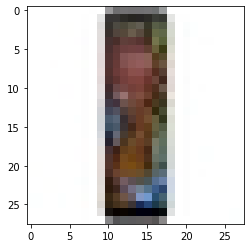

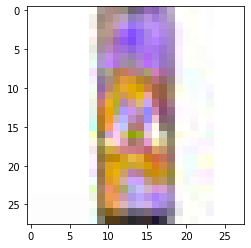

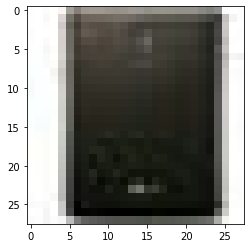

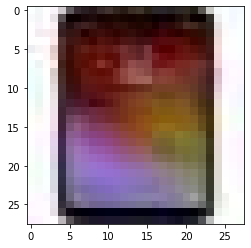

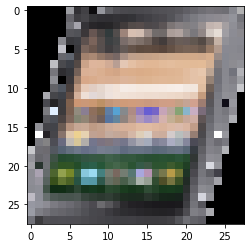

In [ ]:
#plotting all the images from the test dataset in order to see which images were classified wrong
for i in range(len(X_test)):
  plot_image(X_test[i])